## Theory

- E 함수를 사용해 Pixel Intensity의 차이가 얼마나 큰지를 비교.
- M 행렬에 대해 det와 trace를 사용. R 값을 도출.
- R의 eigenvalue를 이용해 edge인지, corner인지를 도출.

## OpenCV

#### cv2.cornerHarris()
- img : Input image. Should be grayscale and float32 type .
- blockSize : Size of neighbourhood considered for corner detection.
- ksize : Aperture parameter of the Sobel derivative used.
- k : Harris detector free parameter in the equation.

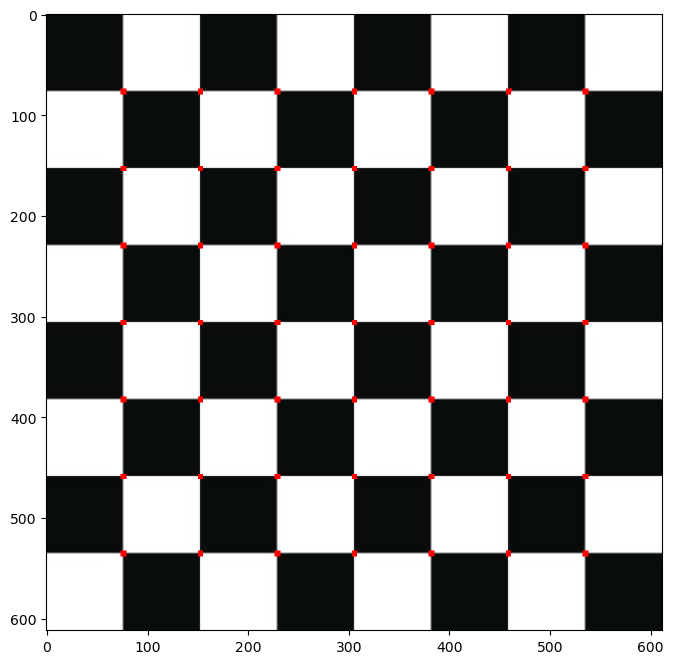

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

filename = './data/chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value.
img[dst>0.01*dst.max()] = [0,0,255]

plt.figure(figsize=(15,8))
plt.imshow(img[:,:,::-1])
plt.show()

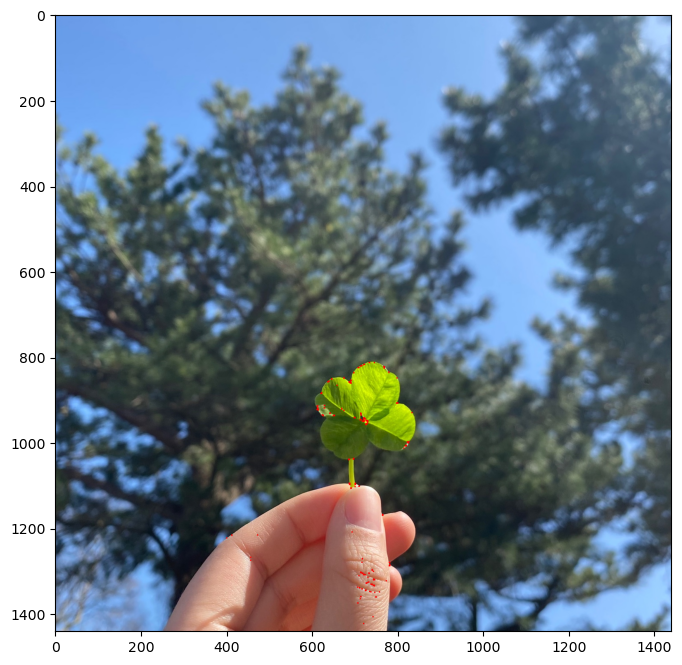

In [3]:
filename = './data/image.jpeg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value.
img[dst>0.01*dst.max()] = [0,0,255]

plt.figure(figsize=(15,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Kornia

torch.Size([1, 1, 612, 612])


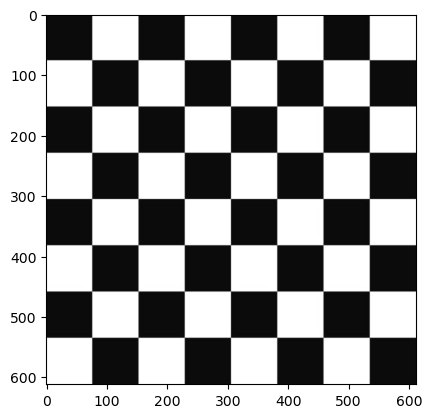

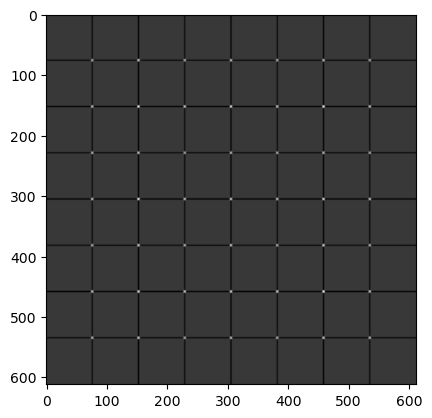

In [5]:
import torch
from torchvision import transforms
import kornia.feature as KF
from PIL import Image

filename = './data/chessboard.jpg'
tensor = transforms.ToTensor()(Image.open(filename).convert('L')).unsqueeze(0)
print(tensor.shape)

plt.imshow(tensor.squeeze(), cmap='gray')
plt.show()

harris = KF.responses.CornerHarris(0.05)
cornerness = harris(tensor)

plt.imshow(cornerness.squeeze(), cmap='gray')
plt.show()